# Style setup

In [1]:
import seaborn as sns
sns.set_theme(context='paper',
             style = 'whitegrid')

# Locations setup

In [2]:
imagefolder = '../images/'

# Gather all the data!
## Starting with Hall

In [3]:
import import_ipynb
import hall_data

importing Jupyter notebook from hall_data.ipynb


In [4]:
hall_df = hall_data.get_df()
hall_df.columns

Index(['doping', 'capping', 'anneal', 'filename', 'mu_H', 'Carrier type', 'n',
       'n_sh', 'R_H', 'R_H_sh', 'rho', 'rho_sh', 'V_H', 'd'],
      dtype='object')

## and $\rho_c$

In [5]:
from rho_c_data import full_df as rho_df

importing Jupyter notebook from rho_c_data.ipynb


## and SE

In [6]:
from SE_batch_data import param_df, optics_df

importing Jupyter notebook from SE_batch_data.ipynb


## Merge Hall and SE, these should behave similarly

In [7]:
df = param_df.merge(hall_df, on = ['doping','anneal', 'capping'])

# Time to make some plots
## Mobility

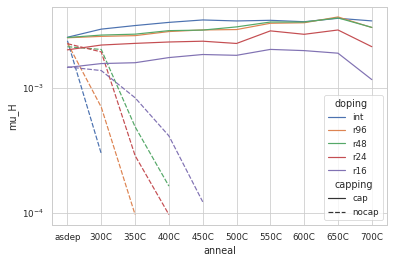

In [8]:
p = sns.lineplot(x = 'anneal',
                y = 'mu_H',
                style = 'capping',
                hue   = 'doping',
                data = hall_df,
                )
    
p.set(yscale = 'log')

p.get_figure().savefig(imagefolder + 'mu_H_vs_anneal.png')

## Carrier density

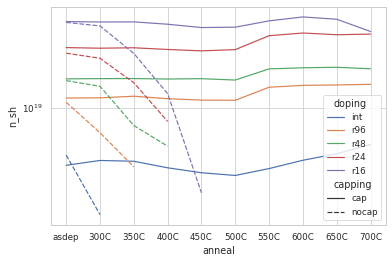

In [9]:
p = sns.lineplot(x = 'anneal',
                y = 'n_sh',
                style = 'capping',
                hue   = 'doping',
                data = hall_df,
                )
    
p.set(yscale = 'log')

p.get_figure().savefig(imagefolder + 'n_sh_vs_anneal.png')

## Resistivity

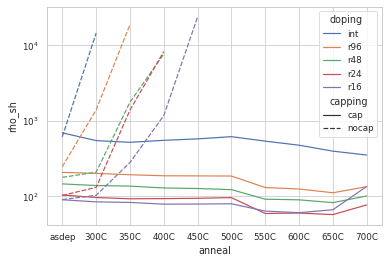

In [10]:
p = sns.lineplot(x = 'anneal',
                y = 'rho_sh',
                style = 'capping',
                hue   = 'doping',
                data = hall_df,
                )
    
p.set(yscale = 'log')

p.get_figure().savefig(imagefolder + 'rho_sh_vs_anneal.png')

## Looking at trends in data!

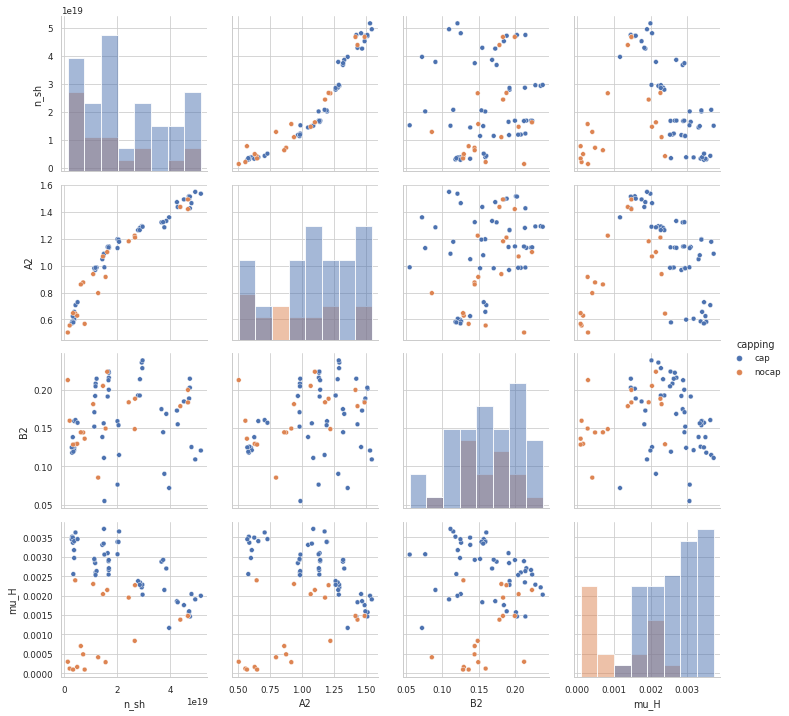

In [11]:
g = sns.PairGrid(df[['n_sh', 'A2', 'B2', 'mu_H','doping', 'capping']], hue = 'capping')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

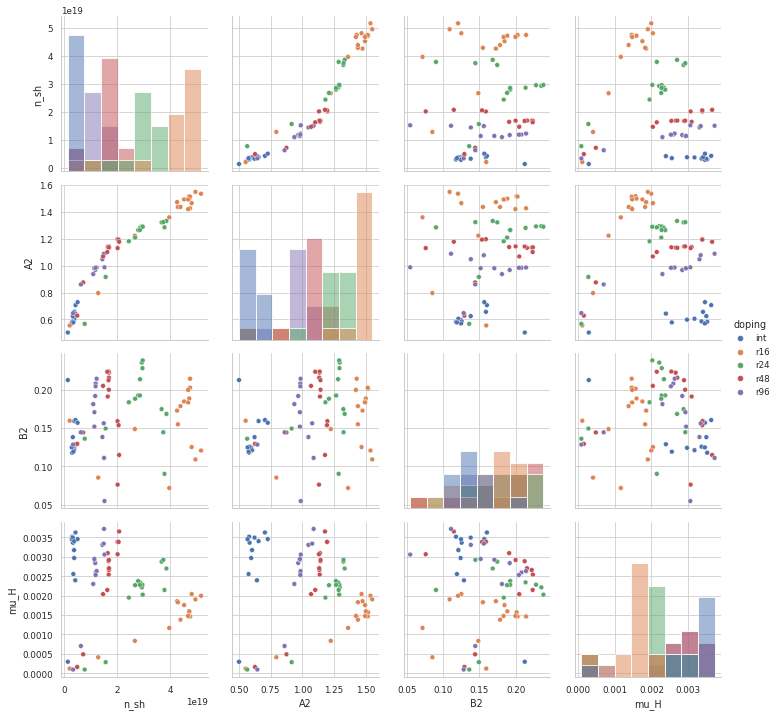

In [12]:
g = sns.PairGrid(df[['n_sh', 'A2', 'B2', 'mu_H','doping', 'capping', 'anneal']], hue = 'doping')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

Some clear clusters can be seen when coloring by doping, kind of neat.
Note that A2 (scattering frequency) and n_sh are nicely correlated (parabolic, as expected).

## Contact resistivities
I'll need to figure out how to use both substrate and anneal temperature as categories, should be possible.
For now: only separated by AZO doping.

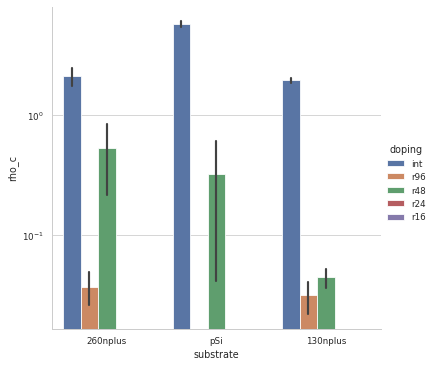

In [13]:
p = sns.catplot(x = 'substrate', y = 'rho_c', hue = 'doping', kind = 'bar', data = rho_df)
p.set(yscale = 'log')
